In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv


In [2]:
df=pd.read_csv("/kaggle/input/clicks-conversion-tracking/KAG_conversion_data.csv")

In [3]:
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1




The documenation describes the columns in the data as follows:

1.) ad_id: unique ID for each ad.

2.) xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3.) fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whom the add is shown

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [4]:
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


We can see 7 features holds int object properties while 1 being float and the rest following object properties

In [6]:
df.shape

(1143, 11)

1143 -> rows

11 -> columns(features)

In [7]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000




Let's break this down now,

count -> number of rows(data points)

mean -> mean of the entire dataset

std -> standard deviation of the entire dataset

min -> minimum value in the dataset

25% (quantile value) -> 25% of the people have clicked on at least one ad 

50%(median value) -> 50% of the people have clicked on at least 8 ads

75% -> 75% of the people have clicked on atleast ads equivalent to 38

max -> maximum value in the dataset

***Let's briefly consider important notes,***

1. For Clicks, 
    * Maximum -  421
    * Minimum - 0
2. Amount spent by the company to show facebook ads,
    * Maximum - 639
    * Minimum - 0
3. Maximum 60 number of people who enquired about the product after seeing the ad 
4. Maximum 21 number of people who bought the product after seeing the ad.
5. Average conversion rate is almost 3%.



In [8]:
print("We have customers from age groups as follows:")
print(df['age'].unique())

We have customers from age groups as follows:
['30-34' '35-39' '40-44' '45-49']


# Clicks vs Gender and Age

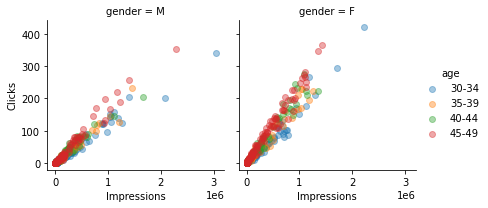

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "Impressions", "Clicks", alpha=.4)
g.add_legend();

It can be depicted that the largest age group(45-49) participated the most for clicks. It is noteworthy to notice the contribution of Female gender is considerably larger than that of Male gender

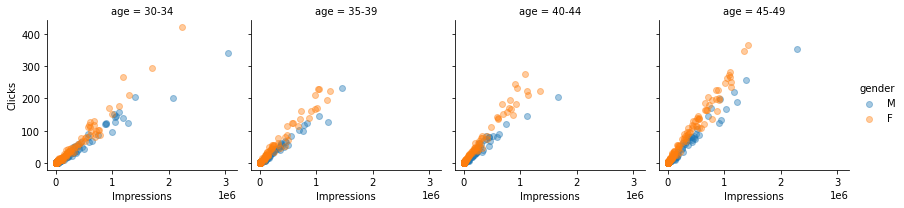

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.FacetGrid(df, col="age", hue="gender")
g.map(plt.scatter, "Impressions", "Clicks", alpha=.4)
g.add_legend();

In both male and female gender, the age groups :45-49 and 30-34 clicks on more ads howevever the rest performs less than 300 clicks

# Who actually enquired about the product

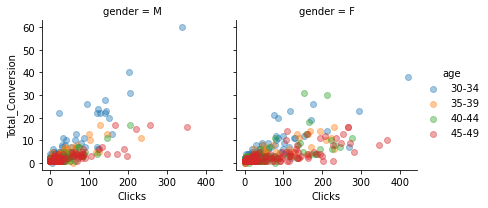

In [11]:
#Let's see how many people actually equired about the product
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "Clicks", "Total_Conversion", alpha=.4)
g.add_legend();

However, even though women tend to click more. Men, especially in the age group of 30-34, tend to enquire more about the products after seeing an ad as compared to women.

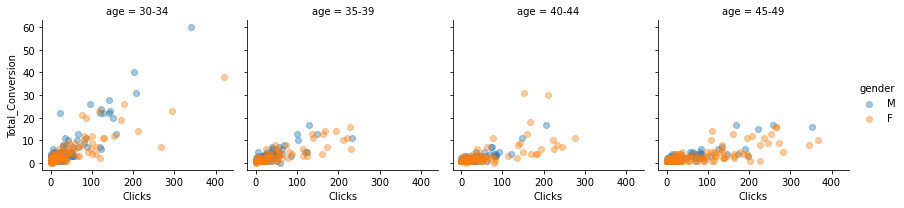

In [12]:
g = sns.FacetGrid(df, col="age", hue="gender")
g.map(plt.scatter, "Clicks", "Total_Conversion", alpha=.4)
g.add_legend();

Highest number of people who enquired about the product after seeing the ad comes from the age group 30-34, for both, male and female. 

# Who actually bought the product

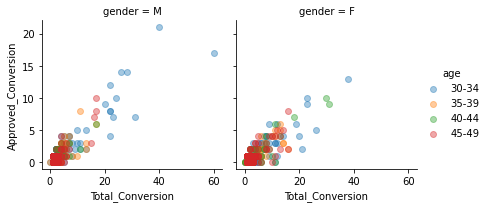

In [13]:
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();

Here, we have compared total_conversion to approved_conversion to represent how many people goes form "enquiring the product after seeing an ad" (total_coversion) to actually "buying the product"(approved_conversion).

Turns out men buys more products than women. 

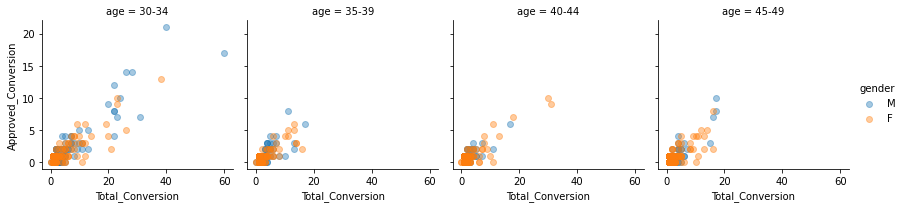

In [14]:
g = sns.FacetGrid(df, col="age", hue="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();

Most men and women in the age group of 30-34 bought products after enquiring about it 

# What have we analysed so far?

*With respect to Gender*
1. Women clicks more on the ads than men
2. Men tends to enquire more about the product than women
3. More Men tends to buy product after enquiring than women

*With respect to Age*
1. The age group of 35-39 showed least participation on clicking ads, enquiring about or buying the products
2. The age group of 45-49 showed highest activity of clicking on ads
3. The age group of 30-34 enquired about the product and bought the product more as compared to the rest of the age groups

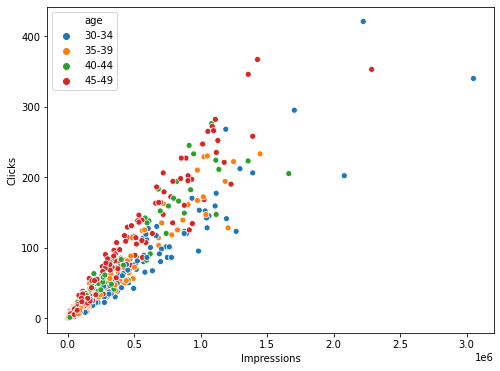

In [15]:
#now let's dive deeper
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Impressions' ,y='Clicks', hue='age', data=df)

Shows a linear relationship, with the increase in number of times the ads are shown, clicks on ads are increasing too!

In [16]:
df['interest'].unique()

array([ 15,  16,  20,  28,  29,  27,  31,   7,  30,  24,  21,  32,  18,
        63,  65,  25,  10,  19,  26,  36,  23,  64,  22,   2,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 112, 113, 108, 109, 114, 104,
       106])

There are total 40 categories in which people's interest is divided

# Sales vs Interests

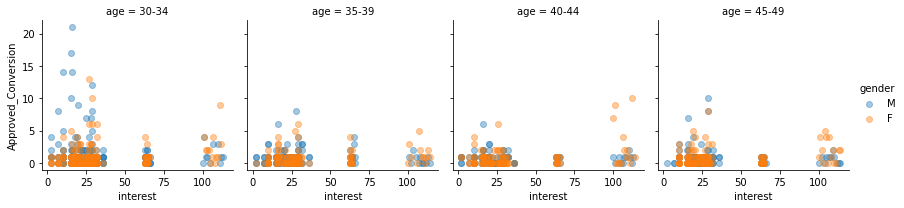

In [17]:
g = sns.FacetGrid(df, col="age", hue="gender")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend();

We can see higher amount of Sales between product id 0-26(for both gender), especially for age group 30-34, as men within the age of 30-34 bought highest amount of products

# Money spent on ads

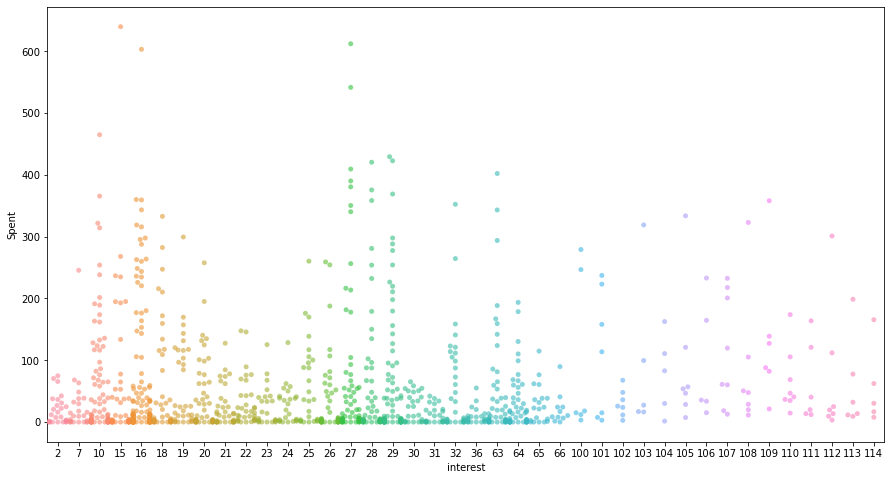

In [18]:
plt.figure(figsize=(15,8))
sns.swarmplot(x = 'interest' ,y='Spent', data=df, alpha = .6)

We can see that highest amount of money spent by a company to display ads lies in the category of interests:

10, 15, 16, 27, 28, 29 and 63

# Campaign vs Geder

<Figure size 576x1080 with 0 Axes>

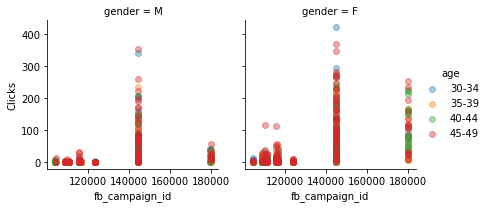

In [19]:
plt.figure(figsize=(8,15))
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "fb_campaign_id", "Clicks", alpha=.4)
g.add_legend();

<Figure size 576x1080 with 0 Axes>

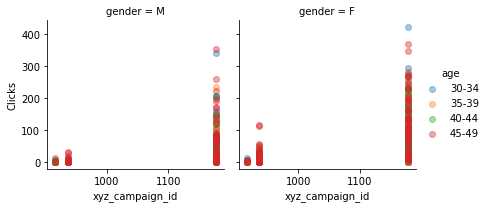

In [20]:
plt.figure(figsize=(8,15))
g = sns.FacetGrid(df, col="gender", hue="age")
g.map(plt.scatter, "xyz_campaign_id", "Clicks", alpha=.4)
g.add_legend();

It shows that campaign ads from facebook and other companies had more female audience than male 

# Who did better?


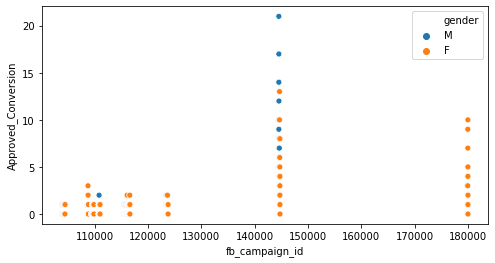

In [21]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'fb_campaign_id' ,y='Approved_Conversion', hue='gender', data=df)

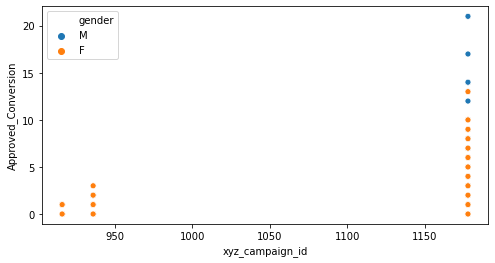

In [22]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'xyz_campaign_id' ,y='Approved_Conversion', hue='gender', data=df)

The above two graphs depicts number of sales achieved as per the campaigns by facebook and other companies as well. Overall, facebook had more sales as compared to other companies

# Who got more clicks?

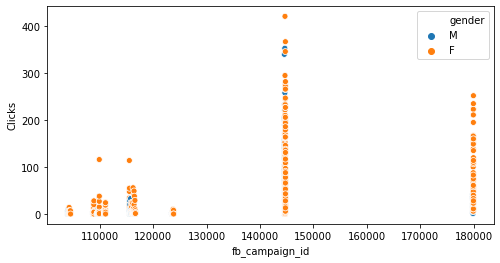

In [23]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'fb_campaign_id' ,y='Clicks', hue='gender', data=df)

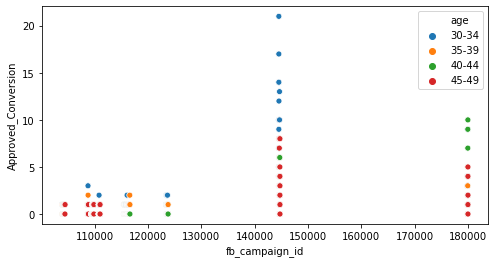

In [24]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'fb_campaign_id' ,y='Approved_Conversion', hue='age', data=df)

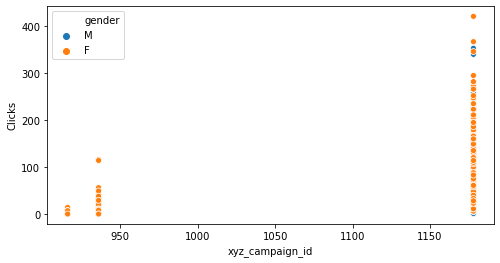

In [25]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'xyz_campaign_id' ,y='Clicks', hue='gender', data=df)

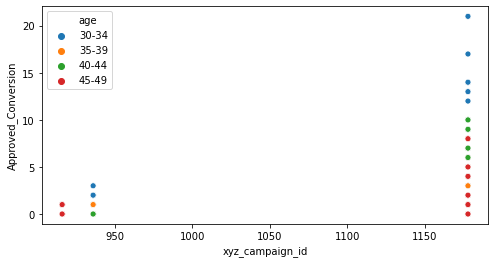

In [26]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'xyz_campaign_id' ,y='Approved_Conversion', hue='age', data=df)

Both the companies got highest amount clicks from age group 45-49 and gender female. 

# Clearly, facebook ads got more clicks. Let's understand why, by analyzing whose ads were shown more?

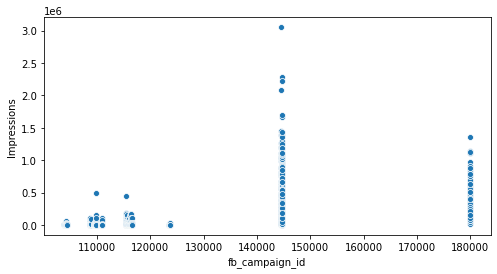

In [27]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'fb_campaign_id' ,y='Impressions', data=df)

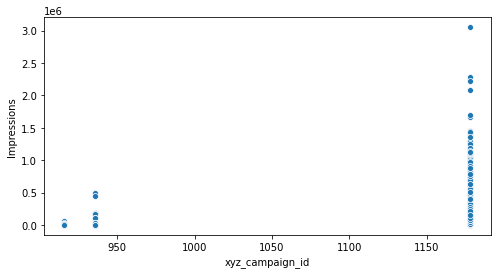

In [28]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'xyz_campaign_id' ,y='Impressions', data=df)

This explains the sales and clicks. The ads by xyz companies were displayed relatively fewer times than facebook ads.

# Who spent more on ads?

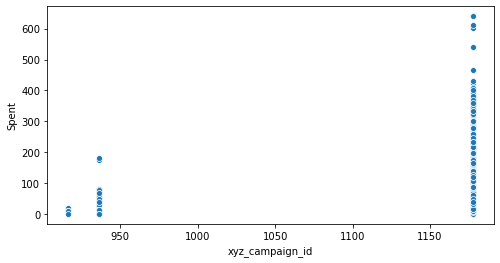

In [29]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'xyz_campaign_id' ,y='Spent', data=df)

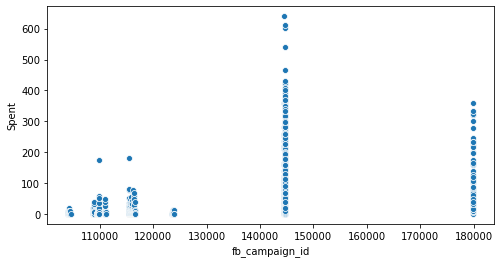

In [30]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'fb_campaign_id' ,y='Spent', data=df)

It is explanatory that facebook spent more, as it displays more ads than other companies. However, xyz companies and facebook both has the highest expenditure on ads of as much as 630 

# Which campagin performed the best?

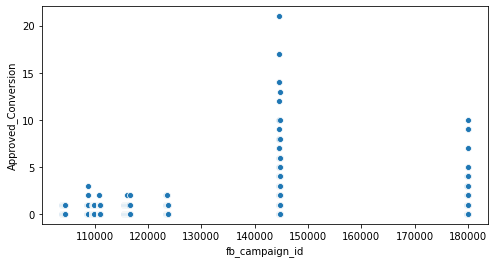

In [31]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'fb_campaign_id' ,y='Approved_Conversion', data=df)

Facebook Campaign id lying between 140k - 150k performed the best by selling the product to as many as 21 people, which is the highest

In [32]:
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

Other companies account for only three campaign ads 

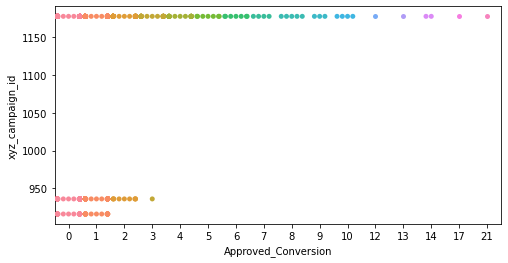

In [33]:
plt.figure(figsize=(8,4))
sns.swarmplot(x = 'Approved_Conversion' ,y='xyz_campaign_id', data=df)

xyz company id 1178 perfomed the best by selling the product to as many as 21 people


# Basic Statistics


*     25% of the people have clicked on at least one ad
*     50% of the people have clicked on at least 8 ads
*     75% of the people have clicked on atleast ads equivalent to 38
*     Maximum number of clicks are 421
*     Maximum amount spent on ads is 639
*     Maximum 60 number of people who enquired about the product after seeing the ad
*     Maximum 21 number of people who bought the product after seeing the ad


# Noteworthy Summary



    The more impression of ads, the more likely ads will be clicked

    Most amount of sales were covered by ads lying in the interest between 0-26

    The highest amount of money(639) spent by a company to display ads lies in the category of interests: 10, 15, 16, 27, 28, 29 and 63

    It shows that campaign ads from facebook and other companies had more female audience than male

    With respect to Gender
        Women clicks more on the ads than men
        Men tends to enquire more about the product than women
        More Men tends to buy product after enquiring than women

    With respect to Age
        The age group of 35-39 showed least participation on clicking ads, enquiring about or buying the products
        The age group of 45-49 showed highest activity of clicking on ads
        The age group of 30-34 enquired about the product and bought the product more as compared to the rest of the age groups


# Insightful Questions



   *Who did better in sales?*

    Overall, facebook had more sales as compared to other companies

   *Who got more clicks?*

    Both the companies got highest amount clicks from age group 45-49 and gender female . Clearly, facebook ads got more clicks.

   *Whose ads were shown more?*

    Facebook. This explains the sales and clicks. The ads by xyz companies were displayed relatively fewer times than facebook ads.

   *Who spent more on ads?*

    It is explanatory that facebook spent more, as it displays more ads than other companies. However, xyz companies and facebook both has the highest expenditure on ads of as much as 630

   *Which campaign performed the best?*

    For Facebook, Campaign id lying between 140k - 150k performed the best by selling the product to as many as 21 people, which is the highest. For the rest of the companies(xyz), company id 1178 perfomed the best by selling the product to as many as 21 people
